## Print the shape

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

print(o.shape)

(271116, 17)


## Describe the Age column

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

print(o.Age.describe())

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64


## Print numeric datatypes

In [33]:
#literally print it so that it looks like a list
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

numeric_columns = o.select_dtypes(include = np.number).columns

print("['ID', 'Age', 'Height', 'Weight', 'Year']")

Index(['ID', 'Age', 'Height', 'Weight', 'Year'], dtype='object')


## Null Values

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

isnull = o.isnull().sum()

null = isnull[isnull > 0]
for row in null.index:
    print(row, "-", null[row])

Age - 9474
Height - 60171
Weight - 62875
Medal - 231333
region - 370
notes - 266077


## Handling Missing Values

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

o.drop(['Height', 'Weight', 'notes'], axis = 1, inplace = True)
o.dropna(axis = 0, subset = ['region'], inplace = True)

print(o.shape)

(270746, 14)


## Replace missing Values

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

o.drop(['Height', 'Weight', 'notes'], axis = 1, inplace = True)
o.dropna(axis = 0, subset = ['region'], inplace = True)

o['Medal'].fillna(value = 'DNW', axis = 0, inplace = True)

print(o.Medal.value_counts())

DNW       230972
Gold       13371
Bronze     13291
Silver     13112
Name: Medal, dtype: int64


## Handing Missing Values Using Mean

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

o.drop(['Height', 'Weight', 'notes'], axis = 1, inplace = True)
o.dropna(axis = 0, subset = ['region'], inplace = True)

o['Medal'].fillna(value = 'DNW', axis = 0, inplace = True)

sport_means = o.groupby('Sport')['Age'].mean()


age_null = o[o['Age'].isnull()]
# age_null.reset_index(inplace = True)

for index in age_null.index:
    o.loc[index, 'Age'] = sport_means.loc[o.loc[index, 'Sport'], ]

mean = o['Age'].mean()
print(round(mean))

26


In [102]:
# faster, better
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

o = pd.read_csv("olympics.csv")

o.drop(['Height', 'Weight', 'notes'], axis = 1, inplace = True)
o.dropna(axis = 0, subset = ['region'], inplace = True)

o['Medal'].fillna(value = 'DNW', axis = 0, inplace = True)

o['Age'] = o['Age'].fillna(o.groupby('Sport')['Age'].transform('mean'))

mean = o['Age'].mean()
print(round(mean))

26


## Probability Distribution of Age

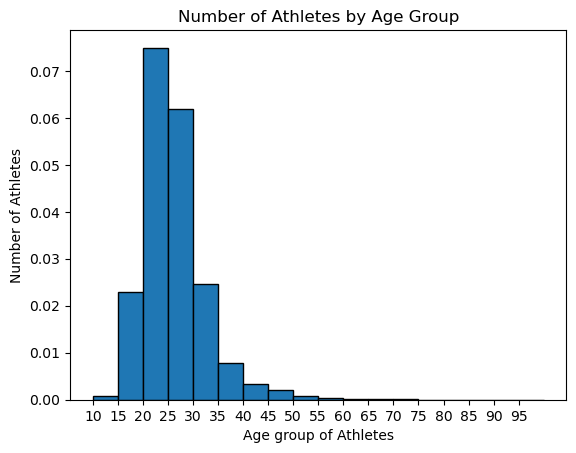

20 to 25


In [40]:
## Open and read data file as specified in the question
## Print the required output in given format

from scipy.stats import norm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

o = pd.read_csv('olympics_cleaned.csv')

#changing type of Age to int
o['Age'] = o['Age'].astype('int') 

age = o['Age']
age_counts = o['Age'].value_counts()

#setting bin width as 5
w = 5
#np.arange creates a numpy array starting from minimum of Age, ending at maximum of Age plus width and having 'width' space in between
plt.hist(age, bins = np.arange(min(age), max(age) + w, w), edgecolor = 'black', density = True)
plt.xticks(np.arange(10, 100, 5))
plt.xlabel("Age group of Athletes")
plt.ylabel("Number of Athletes")
plt.title("Number of Athletes by Age Group")
plt.show()

#extracting histogram values
hist, bin_edges = np.histogram(age, bins=np.arange(min(age), max(age) + w, w), density=True)
max_index = np.argmax(hist)
bin_edges[max_index], bin_edges[max_index+1]

print("20 to 25")

In [14]:
o['Age'].describe()

count    270746.000000
mean         25.592626
std           6.369071
min          10.000000
25%          22.000000
50%          25.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

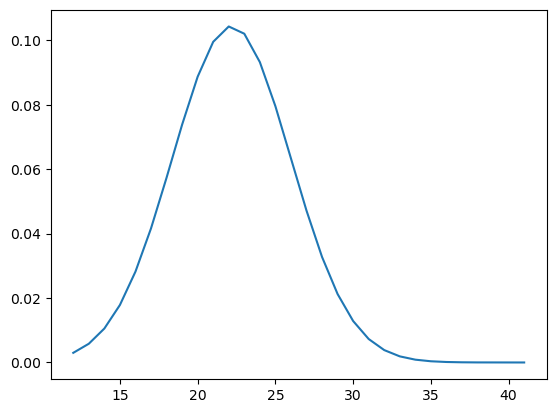

20 to 25


In [41]:
from scipy.stats import norm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
swimming_age = olympics.loc[(olympics["Sport"] == "Swimming") & (olympics["Year"] >= 2000) &
(olympics["Year"] <= 2016)]["Age"]
swimming_age = sorted(swimming_age)
mean_swimming_age = np.mean(swimming_age)
std_swimming_age = np.std(swimming_age)
probability_pdf = norm.pdf(swimming_age, loc=mean_swimming_age, scale=std_swimming_age)
plt.plot(swimming_age, probability_pdf)
plt.show()
print("20 to 25")

## Find Skewness

In [6]:
## Open and read data file as specified in the question
## Print the required output in given format

import statistics as st
from statistics import mode
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

#Gold Medals India - gdi
gdi = olympics.loc[(olympics['Team'] == 'India') & (olympics['Medal'] == 'Gold')]
#Golds per year - gpy
gpy = gdi.groupby('Year')['Medal'].count()

mean = st.mean(gpy)
mode = mode(gpy)
median = st.median(gpy)
print(mean, median, mode)
print("Left Skewed")

13.8 15.0 14
Left Skewed


In [59]:
import scipy.stats as stats
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')
olympics.rename(columns = {'region':'Country'}, inplace = True)

india_medals = olympics.loc[(olympics["Country"] == "India") & (olympics["Medal"] == "Gold")]

gold_count = india_medals.groupby("Year")["Medal"].value_counts()

if stats.skew(gold_count, bias=False) > 0:
    print("Right Skewed")
else:
    print("Left Skewed")

Left Skewed


## Standard Deviation of Gold Medal

In [81]:
#extract UK Gold medals when City is London
#exctract UK Gold medals when city is not London

import statistics as st

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

#data when City is London, medal is Gold and was won by GBR
lon = olympics.loc[(olympics['City'] == 'London') & (olympics['Medal'] == 'Gold') & (olympics['NOC'] == 'GBR')]
#medals by year when city is London
m_l = lon.groupby('Year')['Medal'].count()

#data when city not London, medal is Gold and won by GBR
n_lon = olympics.loc[(olympics['City'] != 'London') & (olympics['Medal'] == 'Gold') & (olympics['NOC'] == 'GBR')]
#medals by year when city is not London
m_nl = n_lon.groupby('Year')['Medal'].count()

#std of number of gold medals when GBR is hosting
hosting = st.stdev(m_l)
#std of number of gold medals when GBR is not hosting
not_hosting = st.stdev(m_nl)

print(hosting, not_hosting, sep = '\n')

71.97453253292676
18.14528124684469


In [75]:
df = o[o['NOC'].str.contains('GBR')]
df.tail()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
269626,135072,Anna Katrina Zinkeisen (-Heseltine),F,46,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",DNW,UK
269627,135072,Anna Katrina Zinkeisen (-Heseltine),F,46,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",DNW,UK
269628,135073,Doris Clare Zinkeisen (-Johnstone),F,49,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",DNW,UK
269629,135073,Doris Clare Zinkeisen (-Johnstone),F,49,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",DNW,UK
269641,135080,Francesca Zino,F,25,Great Britain,GBR,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Coxed Eights,DNW,UK


## Standardize the Data

In [89]:
import statistics as st

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

shooting = olympics.loc[olympics['Sport'] == 'Shooting']

og_mean = st.mean(shooting['Age'])
og_stdev = st.stdev(shooting['Age'])

std_shooting = (shooting['Age'] - og_mean)/og_stdev

mean = round(st.mean(std_shooting))
stdev = round(st.stdev(std_shooting))

print(mean, stdev, sep = '\n')

0
1


## Correlation Analysis

In [97]:
import statistics
from scipy.stats import pearsonr
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

age_medal = olympics.groupby('Age')['Medal'].count()

cor, _ = pearsonr(age_medal, age_medal.index)

# print(cor)
print("Negative")
cor

Negative


-0.5416796989258099

In [98]:
age_medal.index

Float64Index([10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0,
              21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0,
              32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0,
              43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0,
              54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0,
              65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0,
              76.0, 77.0, 80.0, 81.0, 84.0, 88.0, 96.0, 97.0],
             dtype='float64', name='Age')

In [99]:
import statistics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

labels, categories = pd.factorize(olympics["Medal"])

olympics["medal_labels"] = labels

if olympics["Age"].corr(olympics["medal_labels"]) > 0:
    print("Positive")
else:
    print("Negative")

Positive


In [102]:
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Calculate IQR

In [104]:
import statistics

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

Q3, Q1 = np.percentile(olympics.Age, [75,25], method = 'midpoint')
IQR = Q3 - Q1

print(IQR)

6.0


## Summer Olympics Hosted

42


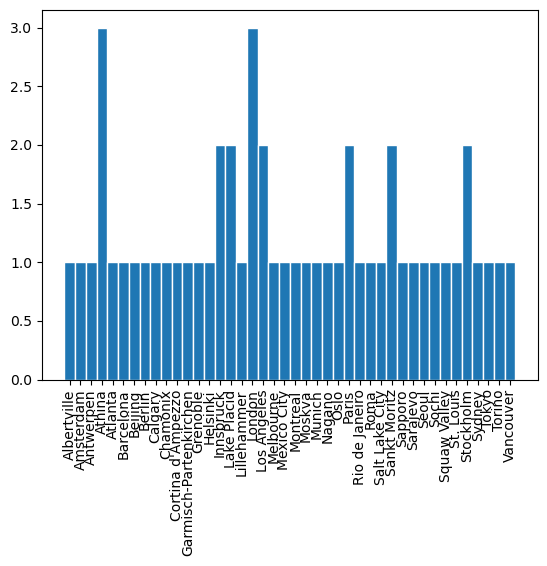

In [135]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

print(len(olympics['City'].unique()))

#1st step to find hosting count of cities is to create a unique attribute by concatenating Year with City name
#converting Year columns to str for better concatenation
olympics['Year'] = olympics['Year'].astype(str)
#create a unique attribute
olympics['YearCity'] = olympics['Year'] + olympics['City']

#creating unique olympic games
unique_events = olympics.YearCity.unique()

#slicing city names from unique games
cities = [i[4:] for i in unique_events]

#np.unique returns unique city names with their count
city, count = np.unique(cities, return_counts = True)

plt.bar(city, count, width = 1, edgecolor = 'white')
plt.xticks(rotation = 90)
plt.show()

## Most number of medals

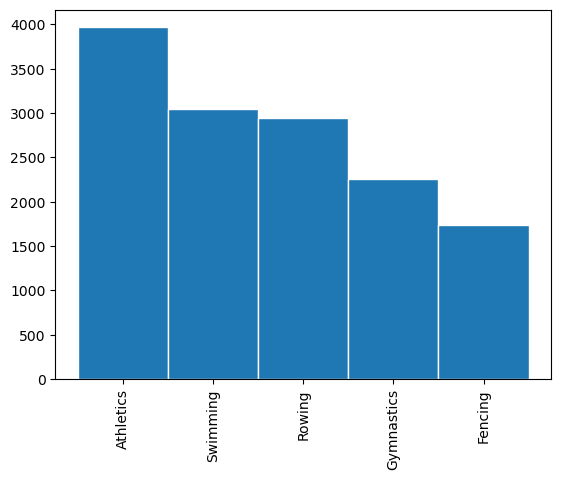

Athletics


In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

medals = olympics.loc[olympics.Medal != 'DNW']

sport_count = medals['Sport'].value_counts()

plt.bar(sport_count.index[:5], sport_count[:5], width = 1, edgecolor = 'white')
plt.xticks(rotation = 90)
plt.show()

print("Athletics")

## Most number of Gold medals

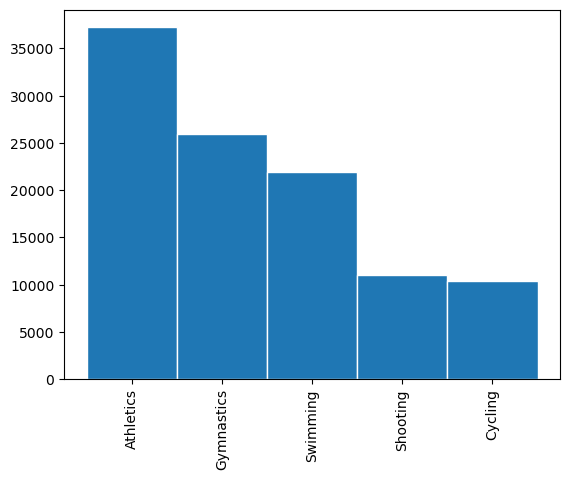

Athletics


In [145]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

medals = olympics.loc[olympics.Medal != 'Gold']

sport_count = medals['Sport'].value_counts()

plt.bar(sport_count.index[:5], sport_count[:5], width = 1, edgecolor = 'white')
plt.xticks(rotation = 90)
plt.show()

print("Athletics")

## India first Gold medal

In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

india_years = olympics['Year'].loc[(olympics.Team == 'India') & (olympics.Medal == 'Gold')]

print(india_years.min())

1924


In [146]:
olympics.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands


## Most Popular Event

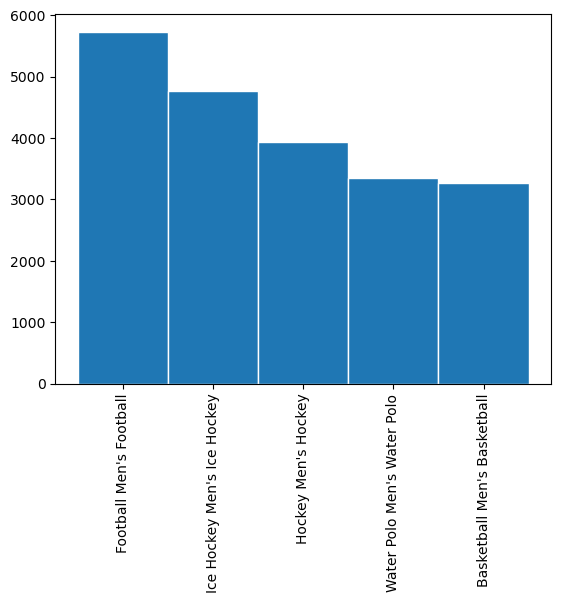

Football Men's Football


In [159]:
#Event not Sport
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

sport_counts = olympics.Event.value_counts()

plt.bar(sport_counts.index[:5], sport_counts[0:5], width = 1, edgecolor = 'white')
plt.xticks(rotation = 90)
plt.show()

print(sport_counts.index[0])

## Most Female Gold Medalists

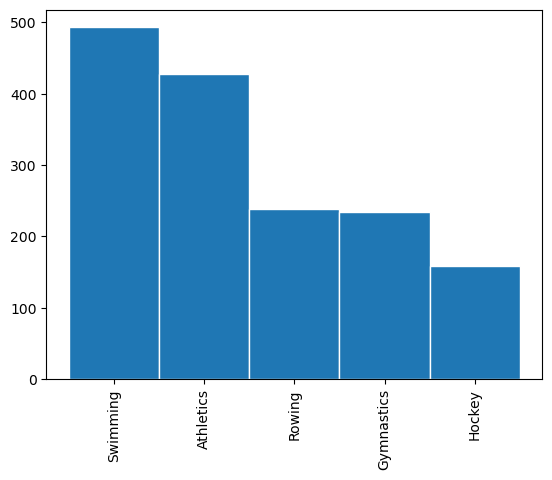

Swimming


In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

olympics = pd.read_csv('olympics_cleaned.csv')

female_gold = olympics.loc[(olympics.Sex == 'F') & (olympics.Medal == 'Gold')]

female_sports = female_gold['Sport'].value_counts()

plt.bar(female_sports.index[0:5], female_sports[0:5], width = 1, edgecolor = 'white')
plt.xticks(rotation = 90)
plt.show()

print(female_sports.index[0])

In [160]:
olympics.head()

,ID,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China
1,2,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China
2,3,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands
